# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('train_house.csv')
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [12]:
# Drop variabel NaN
house_dropped=house.dropna(axis=1)
house_dropped

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [14]:
# Memisahkan data menjadi numerikal & kategorikal
numerical_house=house.select_dtypes(include=['number'])
categorycal_house=house.select_dtypes(include=['object'])
numerical_house

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [16]:
categorycal_house

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

In [28]:
print(house['Utilities'].describe())

count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object


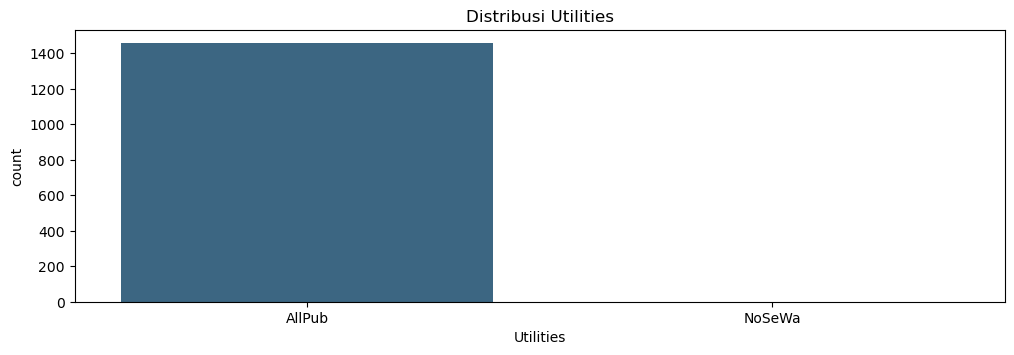

In [18]:
### Tulis kode Anda di sini
plt.figure(figsize=(12, 12))  # Atur ukuran figure

#utilites
plt.subplot(3,1,1)
sns.countplot(x='Utilities', data=house, palette='viridis')
plt.title('Distribusi Utilities')
plt.xlabel('Utilities')
plt.ylabel('count')

plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [30]:
print(house['HouseStyle'].value_counts())

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64


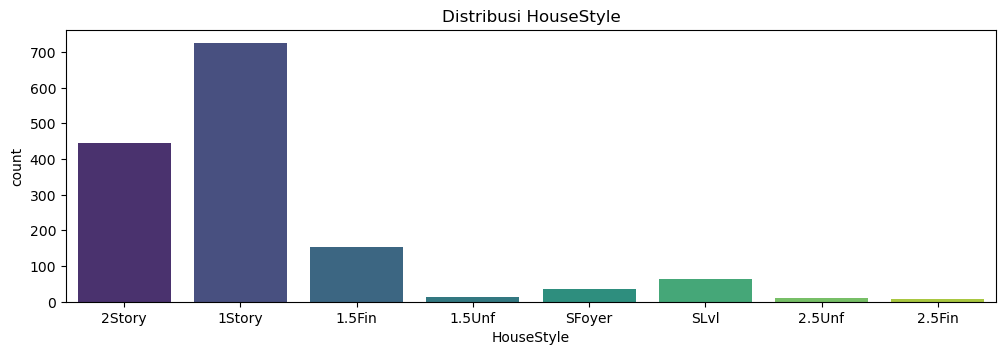

In [20]:
### Tulis kode Anda di sini
plt.figure(figsize=(12,12))

#House Style
plt.subplot(3,1,1)
sns.countplot(x='HouseStyle', data=house, palette='viridis')
plt.title('Distribusi HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('count')

plt.show()

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

In [32]:
print(house['ExterQual'].value_counts())

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64


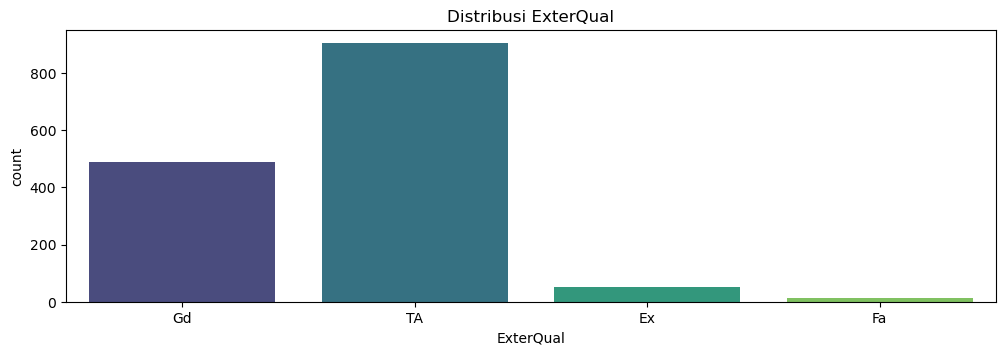

In [22]:
### Tulis kode Anda di sini
plt.figure(figsize=(12,12))

#ExterQual
plt.subplot(3,1,1)
sns.countplot(x='ExterQual', data=house, palette='viridis')
plt.title('Distribusi ExterQual')
plt.xlabel('ExterQual')
plt.ylabel('count')

plt.show()

#### **Analisis tentang variabel kategorikal**

* berdasarkan plot yang telah di buat saya dapat menyimpulkan:
* 
* #Utilites
* Pada bagian utilities hampir semua rumah memberikan fasilitas AllPub dan hanya ada 1 rumah yg memberikan fasilitas NoSeWa

* #HouseStyle
* berdasarkan plot pada distribusi HouseStyle dapat disimpulkan bahwa sebagian besar properti memiliki 1 lantai yang berjumlah 726 lalu diikuti 2 lantai berjumlah lebih dari 445, diikuti 1.5 Fin yg berjumlah 154, serta sisanya masing masing berjumlah kurang dari 100

* #ExterQual
* berdasarkan plot pada ExterQual dapat disimpulkan bahwa sebagian besar properti menggunakan kualitas material Avarage yg jumlahnya mencapai 906 diikuti dengan material berkualitas good seejumlah 488 serta sisanya yang menggunakan kualitas material excellent dan fair masing masing jumlahnya kurang dari 100

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

In [46]:
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [50]:
### Tulis kode Anda di sini
# Median
median_price=house['SalePrice'].median()
# Mean
mean_price=house['SalePrice'].mean()
# Std Dev
std_dev_price=house['SalePrice'].std()

print("median=",median_price)
print("mean=",mean_price)
print("std dev=",std_dev_price)

median= 163000.0
mean= 180921.19589041095
std dev= 79442.50288288663


#### **Analisis tentang variabel `SalePrice`**

* dengan data yang di dapatkan di atas dapat kita simpulkan bahwa harga rata rata rumah itu bernilai 180921.19589041095, serta harga tengah dari suatu rumah itu sebesar 163000.0 dan memiliki standar deviasi sebesar 79442.50288288663

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

In [52]:
### Tulis kode Anda di sini
# Median
median_livarea=house['GrLivArea'].median()
# Mean
mean_livarea=house['GrLivArea'].mean()
# Std Dev
std_dev_livarea=house['GrLivArea'].std()

print("median=",median_livarea)
print("mean=",mean_livarea)
print("std dev=",std_dev_livarea)

median= 1464.0
mean= 1515.463698630137
std dev= 525.4803834232027


#### **Analisis tentang variabel `GrlivArea`**

* setelah di lihat data di atas Setengah rumah memiliki luas ruang tinggal 1464 sq ft atau kurang

*  Rata-rata luas rumah adalah 1515.463698630137 sq ft. Rata-rata yang lebih tinggi dari median menunjukkan kemungkinan adanya rumah dengan luas yang jauh lebih besar.

*  Luas rumah sangat bervariasi, dengan rata-rata perbedaan sekitar 525.4803834232027 sq ft dari rata-rata.

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

In [54]:
### Tulis kode Anda di sini
# Median
median_GA=house['GarageArea'].median()
# Mean
mean_GA=house['GarageArea'].mean()
# Std Dev
std_dev_GA=house['GarageArea'].std()

print("median=",median_GA)
print("mean=",mean_GA)
print("std dev=",std_dev_GA)

median= 480.0
mean= 472.9801369863014
std dev= 213.80484145338076


#### **Analisis tentang variabel `GarageArea`**

* Setengah rumah memiliki luas garasi 480 satuan luas (median).

* Rata rata luas garasi lebih kecil dari median

* standar deviasi luas garasi bernilai 213.80484145338076

## Pemrosesan Data Variabel Numerikal

In [68]:
# Transformasi log-10 SalePrice
houseLogPrice = np.log10(house['SalePrice'])

### Tulis kode Anda di sini
# Median
medianLogP=houseLogPrice.median()
# Mean
meanLogP=houseLogPrice.mean()
# Std Dev
stdLogP=houseLogPrice.std()

print("median log price=",medianLogP)
print("mean log price=",meanLogP)
print("std log price=",stdLogP)

median log price= 5.212187604403958
mean log price= 5.221978956475628
std log price= 0.17347974217176843


In [72]:
# Transformasi log-10 GrLivArea
luas_tanah=np.log10(house['GrLivArea'])

### Tulis kode Anda di sini
# Median
medianLogLuasT=luas_tanah.median()
# Mean
meanLogLuasT=luas_tanah.mean()
# Std Dev
stdLogLuasT=luas_tanah.std()

print("median log 1 GrLivArea=",medianLogLuasT)
print("mean log 1 GrLivArea=",meanLogLuasT)
print("std log 1 GrLivArea=",stdLogLuasT)

median log 1 GrLivArea= 3.165541076722373
mean log 1 GrLivArea= 3.156354310389778
std log 1 GrLivArea= 0.14485910869663873


In [74]:
# Menghilangkan nilai nol pada GarageArea
luas_tanah_tidak0=house[house['GrLivArea']>0]
luas_tanah_tidak0_logPrice=np.log10(luas_tanah_tidak0['GrLivArea'])

### Tulis kode Anda di sini
# Median
medianLogLuasT=luas_tanah_tidak0_logPrice.median()
# Mean
meanLogLuasT=luas_tanah_tidak0_logPrice.mean()
# Std Dev
stdLogLuasT=luas_tanah_tidak0_logPrice.std()

print("median log 1 GrLivArea=",medianLogLuasT)
print("mean log 1 GrLivArea=",meanLogLuasT)
print("std log 1 GrLivArea=",stdLogLuasT)

median log 1 GrLivArea= 3.165541076722373
mean log 1 GrLivArea= 3.156354310389778
std log 1 GrLivArea= 0.14485910869663873


#### **Penjelasan dan analisis tentang pemrosesan data**

* [*tulis penjelasan dan analisis Anda di sini*]

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

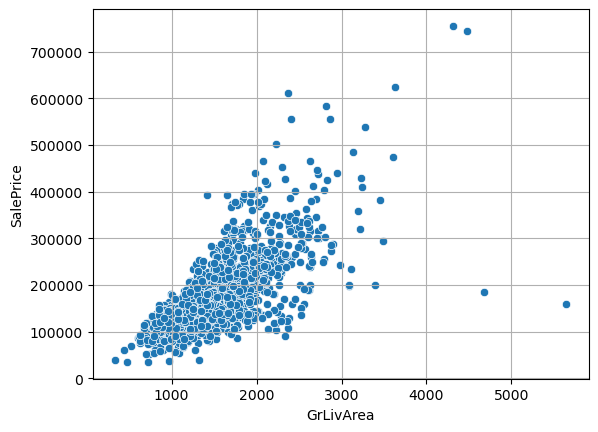

In [92]:
ax = sns.scatterplot(x='GrLivArea',y='SalePrice',data=house)
plt.grid(True)

# `GarageArea` dengan `SalePrice`

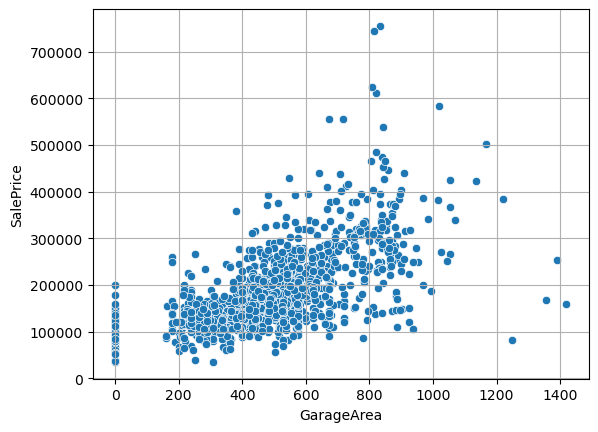

In [94]:
ax = sns.scatterplot(x='GarageArea',y='SalePrice',data=house)
plt.grid(True)

#### **Hipotesis tentang hubungan antar-variabel**

GrLivArea dan SalePrice:

Visualisasi 2D menunjukkan hubungan positif linear antara GrLivArea (luas ruang tinggal) dan SalePrice (harga penjualan). Titik-titik data pada scatter plot cenderung membentuk pola garis lurus yang menunjukkan bahwa semakin besar luas ruang tinggal, semakin tinggi harga penjualan rumah. Ini mengindikasikan bahwa luas ruang tinggal memiliki pengaruh signifikan terhadap harga penjualan

GarageArea dan SalePrice:

Visualisasi 2D untuk hubungan antara GarageArea (luas garasi) dan SalePrice juga menunjukkan pola linear positif. Namun, hubungan ini tidak begitu kuat atau signifikan seperti yang terlihat antara GrLivArea dan SalePrice. Titik-titik data pada scatter plot untuk GarageArea dan SalePrice membentuk pola linear, tetapi dengan variasi yang lebih besar, yang menunjukkan bahwa luas garasi memiliki dampak yang lebih kecil terhadap harga penjualan dibandingkan luas ruang tinggal